# Initial set-up

In [4]:
import pandas as pd
from datetime import date, datetime
from matplotlib import pyplot as plt
import requests
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib as np

In [5]:
#This function helps to extract the data

base_url = "https://analytics.wikimedia.org/published/datasets"
cols =["wiki_db", "project", "country", "country_code", "activity_level", "count_eps", "sum_eps", "count_release_thresh", "editors", "edits", "time"]   #Table 

def get_url(ds, type):
    d = datetime.strptime(ds, "%Y-%m").date()
    if d < date(2023, 7, 1) or d > date.today():
        print("Not a valid date. Please try a month between July 2023 and now")
    else:
        if type == "monthly":
            return f"{base_url}/geoeditors_monthly/{ds}.tsv"
        elif type == "weekly":
            return f"{base_url}/geoeditors_weekly/{ds}.tsv"
    return None

# Get monthly data

In [6]:
### genera la lista de meses ###
current_date = datetime.now()
start_date = datetime(2023, 7, 1)
date_list = []

# Generate dates from July 2023 to one month before the current month
while start_date < current_date.replace(day=1):
    date_list.append(start_date.strftime("%Y-%m"))
    start_date += timedelta(days=30)  # Add 30 days to move to the next month

date_list = list(set(date_list))
# Sort the list of unique dates in ascending order
date_list.sort()
#print(date_list)

masterdf = pd.DataFrame()
user_level = ["1 to 4", "5 to 99", "100 or more"]

['2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12', '2024-01', '2024-02', '2024-03', '2024-04', '2024-05']


# Select the country
Here you put the country code (ISO alpha-2 codes). For example, for Chile use "CL".

In [7]:

#get dataframe for all the weeks
country = "CL"

for i in date_list:
	try:
		ds = i
		url = get_url(ds, type="monthly")
		#print(url)
		df = pd.read_csv(url, delimiter='\t', names=cols, on_bad_lines='warn')                              
		filtered_df = df[df["country_code"] == country]                                                                  #CL filter
		masterdf = pd.concat([masterdf, filtered_df], axis=0, ignore_index=True)                                #Create the master dataframe
	except:
		pass



In [33]:
masterdf

,wiki_db,project,country,country_code,activity_level,count_eps,sum_eps,count_release_thresh,editors,edits,time
0,afwiki,af.wikipedia,Chile,CL,1 to 4,1.1,0.9,8,9,13.0,2023-07
1,afwiktionary,af.wiktionary,Chile,CL,5 to 99,1.1,0.9,8,8,0.0,2023-07
2,commonswiki,en.commons,Chile,CL,1 to 4,1.1,0.9,8,182,248.0,2023-07
3,commonswiki,en.commons,Chile,CL,5 to 99,1.1,0.9,8,91,2126.0,2023-07
4,dewiki,de.wikipedia,Chile,CL,1 to 4,1.1,0.9,8,18,14.0,2023-07
...,...,...,...,...,...,...,...,...,...,...,...
247,itwiki,it.wikipedia,Chile,CL,1 to 4,1.1,0.9,8,18,23.0,2024-05
248,metawiki,en.meta,Chile,CL,1 to 4,1.1,0.9,8,25,28.0,2024-05
249,enwiktionary,en.wiktionary,Chile,CL,1 to 4,1.1,0.9,8,10,12.0,2024-05
250,enwiki,en.wikipedia,Chile,CL,100 or more,1.1,0.9,8,11,1261.0,2024-05


# ENWIKI

In [36]:
enwiki = masterdf.loc[(masterdf.project == "en.wikipedia")]
enwiki = enwiki.sort_values(by="time")
#enwiki

## editors-enwiki

In [37]:
enwiki_editors = enwiki.pivot(index='time', columns='activity_level', values='editors')
enwiki_editors = enwiki_editors[user_level]                     
enwiki_editors

activity_level,1 to 4,5 to 99,100 or more
time,,,
2023-07,718,154,11
2023-08,725,178,11
2023-09,726,127,12
2023-10,767,146,12
2023-11,691,148,10
2023-12,695,112,12
2024-01,743,131,15
2024-02,667,141,11
2024-03,694,131,11


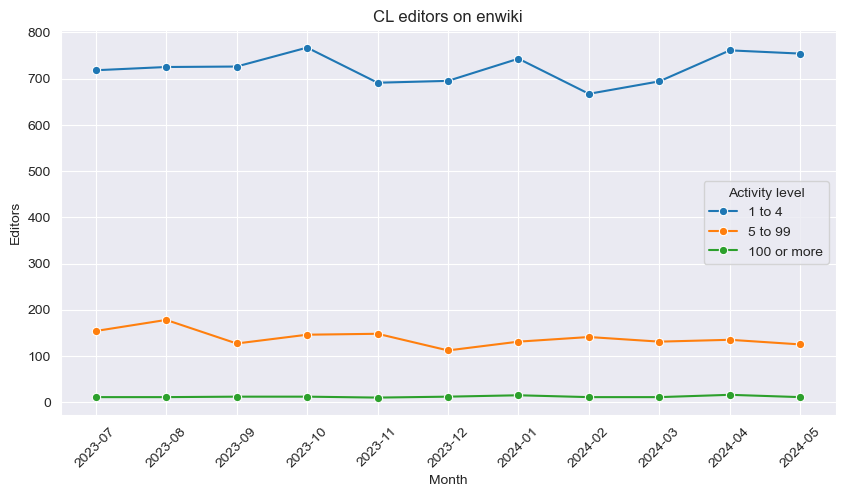

In [38]:
enwiki['editors'] = pd.to_numeric(enwiki['editors'], errors='coerce')

sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
for level in user_level:
    subset = enwiki[enwiki.activity_level == level]
    sns.lineplot(data=subset, x="time", y="editors", label=level, marker="o")

plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Editors')
plt.title(f"{country} editors on enwiki")
plt.legend(title='Activity level')
plt.show()

## edits-enwiki

In [39]:
enwiki_edits = enwiki.pivot(index='time', columns='activity_level', values='edits')
enwiki_edits = enwiki_edits[user_level]                     
enwiki_edits

activity_level,1 to 4,5 to 99,100 or more
time,,,
2023-07,923.0,2809.0,1452.0
2023-08,961.0,2489.0,1145.0
2023-09,988.0,1940.0,1204.0
2023-10,1025.0,2288.0,1477.0
2023-11,923.0,2477.0,1119.0
2023-12,939.0,2152.0,1297.0
2024-01,992.0,2112.0,1560.0
2024-02,866.0,2087.0,1112.0
2024-03,947.0,2168.0,1381.0


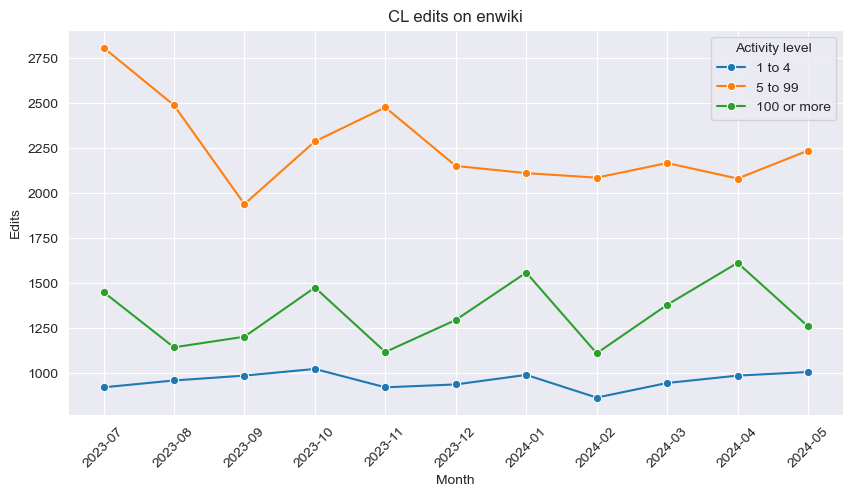

In [40]:
enwiki['edits'] = pd.to_numeric(enwiki['edits'], errors='coerce')

sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
for level in user_level:
    subset = enwiki[enwiki.activity_level == level]
    sns.lineplot(data=subset, x="time", y="edits", label=level, marker="o")

plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Edits')
plt.title(f"{country} edits on enwiki")
plt.legend(title='Activity level')
plt.show()

# ESWIKI

In [32]:
eswiki = masterdf.loc[(masterdf.project == "es.wikipedia")]
eswiki = eswiki.sort_values(by="time")
#eswiki

## editors-eswiki

In [11]:
eswiki_editors = eswiki.pivot(index='time', columns='activity_level', values='editors')
eswiki_editors = eswiki_editors[user_level]                     
eswiki_editors

activity_level,1 to 4,5 to 99,100 or more
time,,,
2023-07,4514,808,63
2023-08,5217,777,76
2023-09,4894,728,62
2023-10,5544,813,71
2023-11,5183,821,60
2023-12,4020,851,61
2024-01,4122,883,62
2024-02,3857,787,54
2024-03,4374,721,53


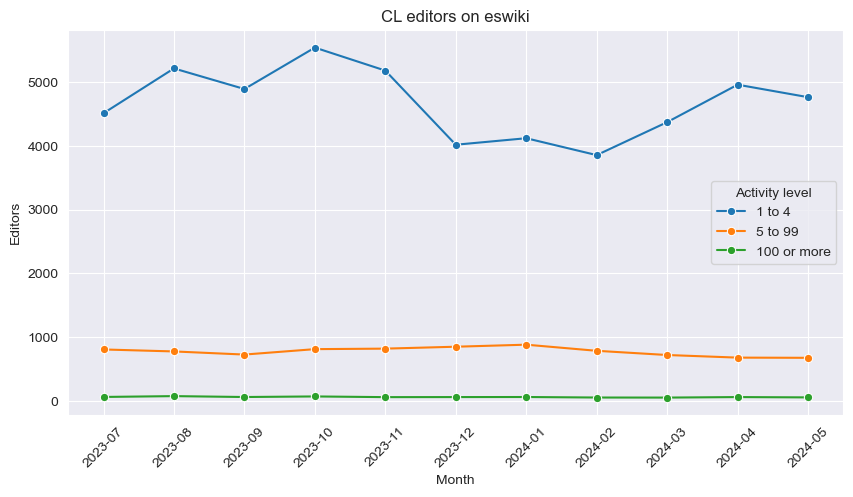

In [12]:
eswiki['editors'] = pd.to_numeric(eswiki['editors'], errors='coerce')

sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
for level in user_level:
    subset = eswiki[eswiki.activity_level == level]
    sns.lineplot(data=subset, x="time", y="editors", label=level, marker="o")

plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Editors')
plt.title(f"{country} editors on eswiki")
plt.legend(title='Activity level')
plt.show()


## edits-eswiki

In [13]:
eswiki_edits = eswiki.pivot(index='time', columns='activity_level', values='edits')
eswiki_edits = eswiki_edits[user_level]                     
eswiki_edits

activity_level,1 to 4,5 to 99,100 or more
time,,,
2023-07,5960,12873,5982
2023-08,6889,12153,7560
2023-09,6522,11835,6124
2023-10,7482,13087,7162
2023-11,6973,13014,6352
2023-12,5407,13607,6345
2024-01,5581.0,14799.0,6138.0
2024-02,5166.0,14488.0,5340.0
2024-03,5694.0,13527.0,5261.0


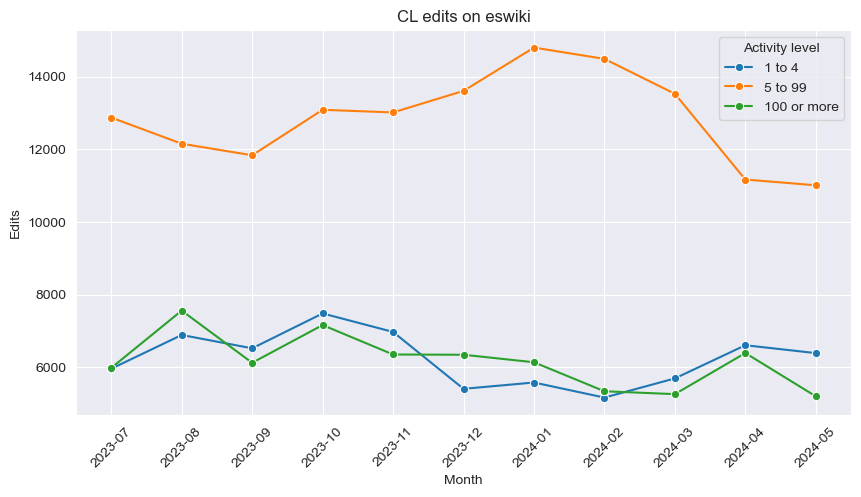

In [14]:
eswiki['edits'] = pd.to_numeric(eswiki['edits'], errors='coerce')

sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
for level in user_level:
    subset = eswiki[eswiki.activity_level == level]
    sns.lineplot(data=subset, x="time", y="edits", label=level, marker="o")

plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Edits')
plt.title(f"{country} edits on eswiki")
plt.legend(title='Activity level')
plt.show()

# WIKIDATA

In [15]:
wikidata = masterdf.loc[(masterdf.wiki_db == "wikidatawiki")]
wikidata = wikidata.sort_values(by="time")

## editors-wikidata

In [16]:
wikidata_editors = wikidata.pivot(index='time', columns='activity_level', values='editors')
wikidata_editors = wikidata_editors[user_level]
wikidata_editors

activity_level,1 to 4,5 to 99,100 or more
time,,,
2023-07,355,83,9
2023-08,449,99,NaN
2023-09,379,86,11
2023-10,446,92,11
2023-11,410,100,14
2023-12,322,87,13
2024-01,307,101,16
2024-02,327,93,10
2024-03,364,90,9


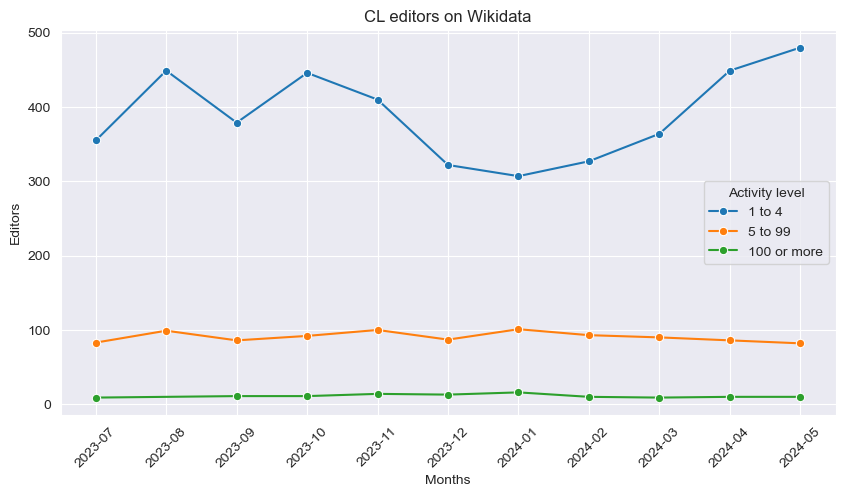

In [17]:
wikidata['editors'] = pd.to_numeric(wikidata['editors'], errors='coerce')

sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
for level in user_level:
    subset = wikidata[wikidata.activity_level == level]
    sns.lineplot(data=subset, x="time", y="editors", label=level, marker="o")

plt.xticks(rotation=45)
plt.xlabel('Months')
plt.ylabel('Editors')
plt.title(f"{country} editors on Wikidata")
plt.legend(title='Activity level')
plt.show()

## edits-wikidata

In [18]:
wikidata_edits = wikidata.pivot(index='time', columns='activity_level', values='edits')
wikidata_edits = wikidata_edits[user_level]
wikidata_edits

activity_level,1 to 4,5 to 99,100 or more
time,,,
2023-07,465,1536,983
2023-08,555,2090,NaN
2023-09,499,1993,943
2023-10,580,1737,1161
2023-11,512,1765,1016
2023-12,429,1442,1204
2024-01,392.0,2293.0,2047.0
2024-02,451.0,2083.0,1225.0
2024-03,480.0,1726.0,1037.0


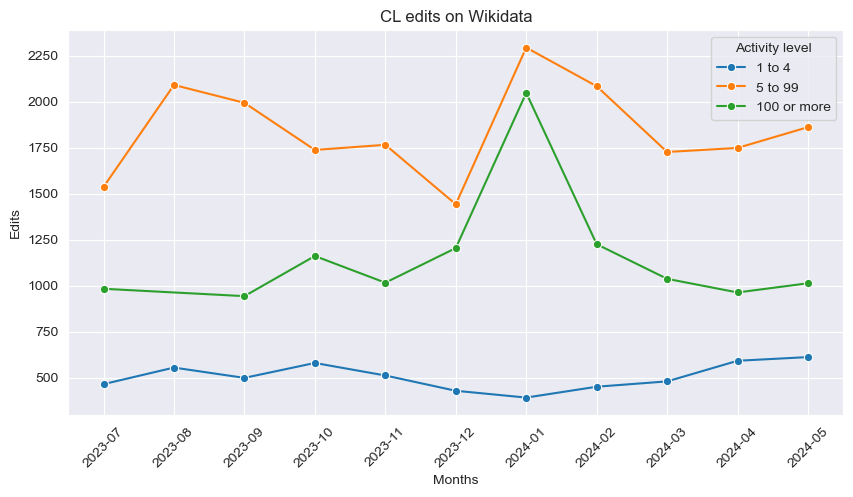

In [19]:
wikidata['edits'] = pd.to_numeric(wikidata['edits'], errors='coerce')

sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
for level in user_level:
    subset = wikidata[wikidata.activity_level == level]
    sns.lineplot(data=subset, x="time", y="edits", label=level, marker="o")

plt.xticks(rotation=45)
plt.xlabel('Months')
plt.ylabel('Edits')
plt.title(f"{country} edits on Wikidata")
plt.legend(title='Activity level')
plt.show()

# COMMONS

In [20]:
commons = masterdf.loc[(masterdf.wiki_db == "commonswiki")]
commons = commons.sort_values(by="time")

## editors-commons

In [21]:
commons_editors = commons.pivot(index='time', columns='activity_level', values='editors')
commons_editors = commons_editors[user_level]
commons_editors

activity_level,1 to 4,5 to 99,100 or more
time,,,
2023-07,182,91,NaN
2023-08,138,101,NaN
2023-09,130,74,8
2023-10,118,60,8
2023-11,127,57,NaN
2023-12,136,53,NaN
2024-01,128,71,NaN
2024-02,196,134,9
2024-03,181,106,8


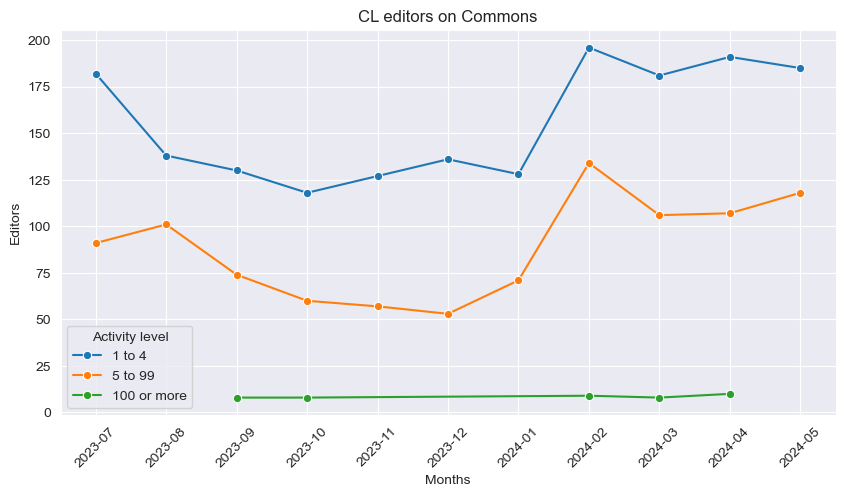

In [22]:
commons['editors'] = pd.to_numeric(commons['editors'], errors='coerce')

sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))

for level in user_level:
    subset = commons[commons.activity_level == level]
    sns.lineplot(data=subset, x="time", y="editors", label=level, marker="o")

plt.xticks(rotation=45)
plt.xlabel('Months')
plt.ylabel('Editors')
plt.title(f"{country} editors on Commons")
plt.legend(title='Activity level')
plt.show()

## edits-commons

In [23]:
commons_edits = commons.pivot(index='time', columns='activity_level', values='edits')
commons_edits = commons_edits[user_level]
commons_edits

activity_level,1 to 4,5 to 99,100 or more
time,,,
2023-07,248,2126,NaN
2023-08,178,2036,NaN
2023-09,180,1648,611
2023-10,161,1358,614
2023-11,164,1192,NaN
2023-12,184,916,NaN
2024-01,144.0,1644.0,NaN
2024-02,255.0,2514.0,822.0
2024-03,239.0,1428.0,825.0


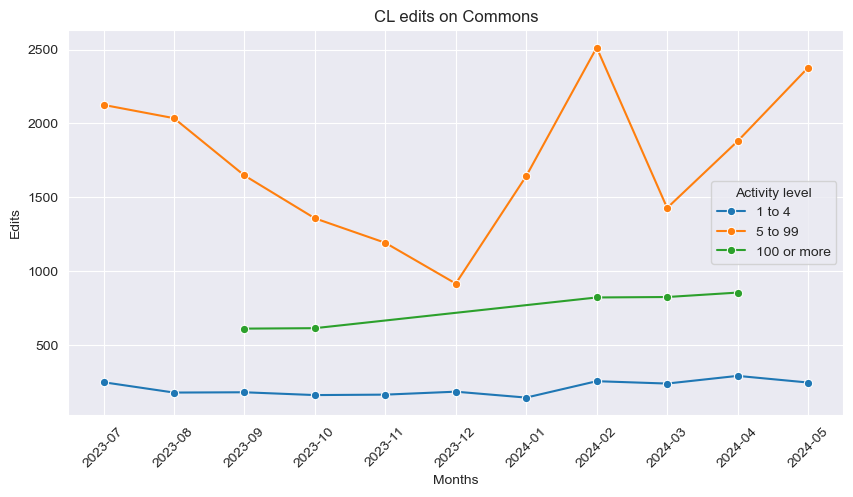

In [24]:
commons['edits'] = pd.to_numeric(commons['edits'], errors='coerce')

sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
for level in user_level:
    subset = commons[commons.activity_level == level]
    sns.lineplot(data=subset, x="time", y="edits", label=level, marker="o")

plt.xticks(rotation=45)
plt.xlabel('Months')
plt.ylabel('Edits')
plt.title(f"{country} edits on Commons")
plt.legend(title='Activity level')
plt.show()

# Edits per project

Text(0.5, 1.07, 'CL edits on Wiki projects')

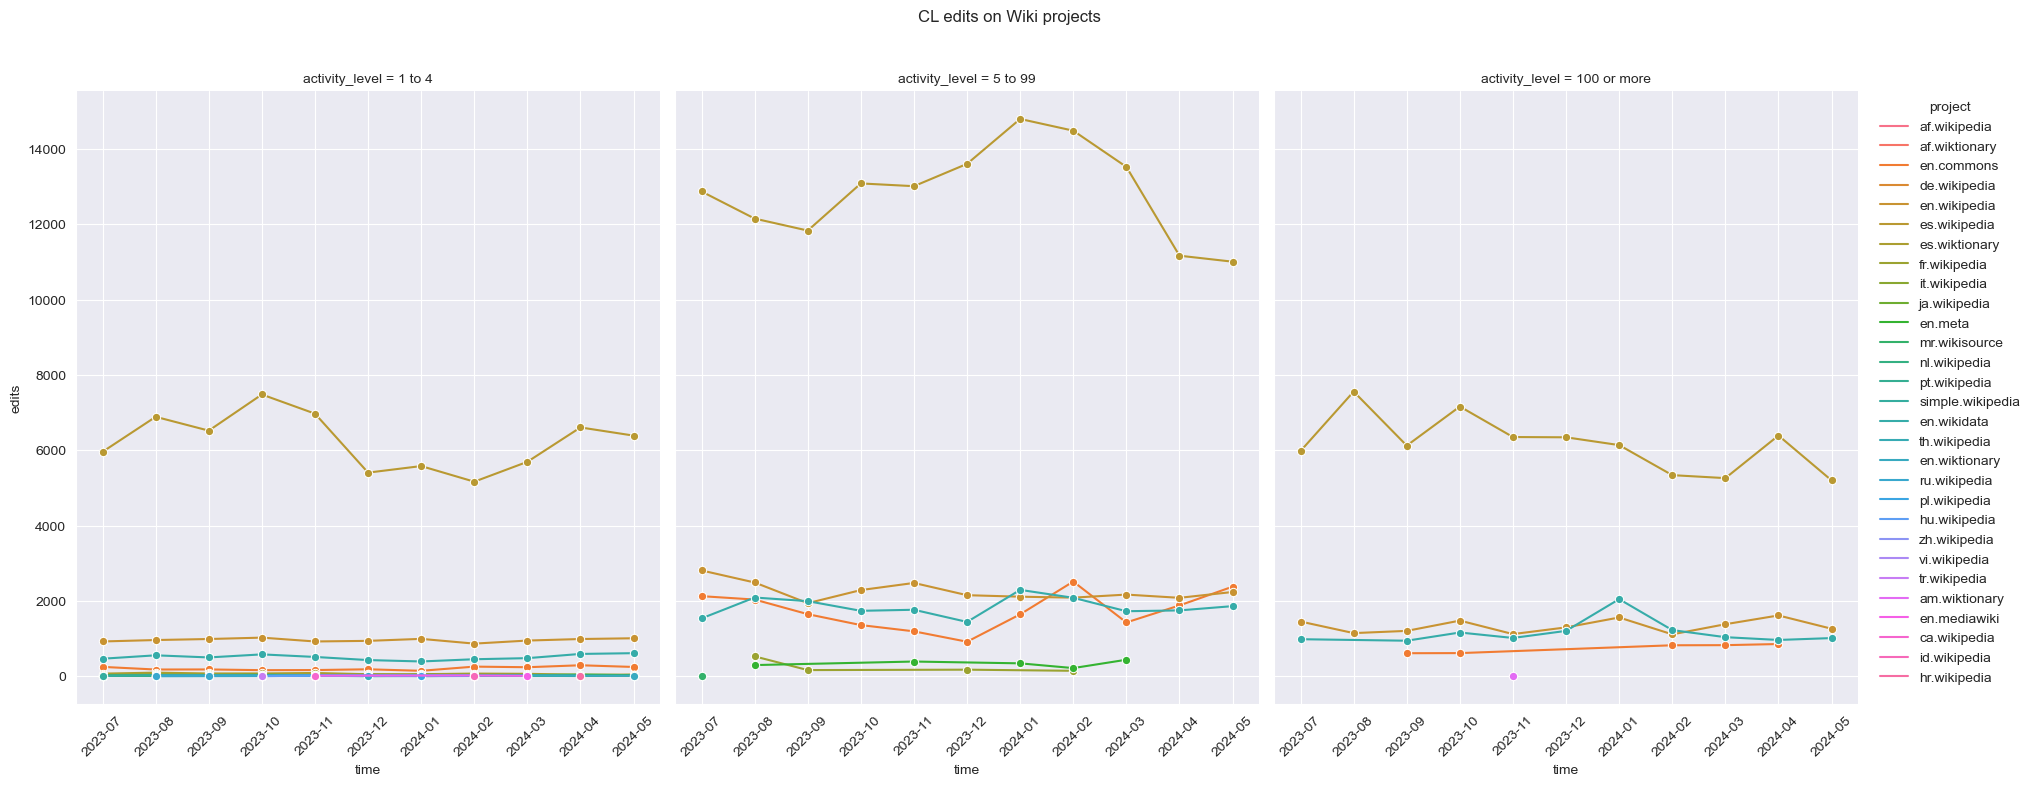

In [25]:
#### Data for every project #####
masterdf['edits'] = pd.to_numeric(masterdf['edits'], errors='coerce')
masterdf['editors'] = pd.to_numeric(masterdf['editors'], errors='coerce')

g= sns.relplot(
    data=masterdf,
    x="time", y="edits",
    hue="project", col="activity_level",
    height=7, aspect=.9, kind="line", marker="o",
    col_order=user_level 
)

g.set_xticklabels(rotation = 45)
g.fig.suptitle(f"{country} edits on Wiki projects", y=1.07, ha="center")
